<a href="https://colab.research.google.com/github/DivyanshRana1515/Deep-Learning-Lab-/blob/main/Exp_9_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


(42000, 785)
(28000, 784)


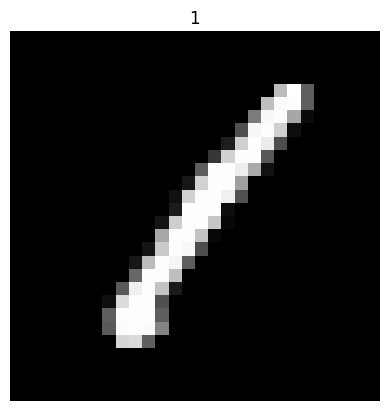

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(train.shape)    # (42000, 785)
print(test.shape)     # (28000, 784)

plt.imshow(train.iloc[0, 1:].values.reshape(28,28), cmap='gray')
plt.title(train.iloc[0, 0])
plt.axis('off')
plt.show()

In [5]:
X_train = train.drop('label', axis=1)/255.0
X_train = X_train.values.reshape(-1, 28, 28, 1)
Y_train = tf.keras.utils.to_categorical(train['label'], num_classes=10)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=2
)


In [7]:
model = Sequential([
    Conv2D(8, (5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(16, (3, 3), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])


In [8]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
datagen = ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)


In [10]:
batch_size = 250
epochs = 15
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, Y_val),
    steps_per_epoch=X_train.shape[0] // batch_size
)

Epoch 1/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - accuracy: 0.4704 - loss: 1.5429 - val_accuracy: 0.9407 - val_loss: 0.2240
Epoch 2/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7880 - loss: 0.6661 - val_accuracy: 0.9429 - val_loss: 0.2237
Epoch 3/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 33s 220ms/step - accuracy: 0.8488 - loss: 0.4860 - val_accuracy: 0.9617 - val_loss: 0.1357
Epoch 4/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9240 - loss: 0.2272 - val_accuracy: 0.9629 - val_loss: 0.1355
Epoch 5/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 40s 224ms/step - accuracy: 0.8977 - loss: 0.3316 - val_accuracy: 0.9700 - val_loss: 0.1065
Epoch 6/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8960 - loss: 0.3050 - val_accuracy: 0.9707 - val_loss: 0.1062
Epoch 7/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 33s 220ms/step - accuracy: 0.9145 - loss: 0.2692 - val_accuracy: 0.9738 - val_loss: 0.0891
Epoch 8/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9080 - loss: 0.3150 - val

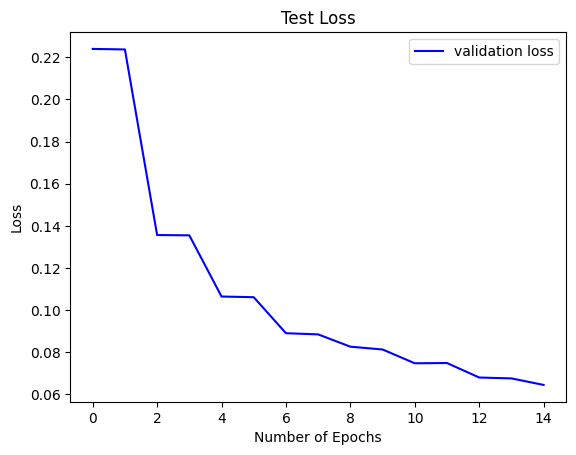

132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


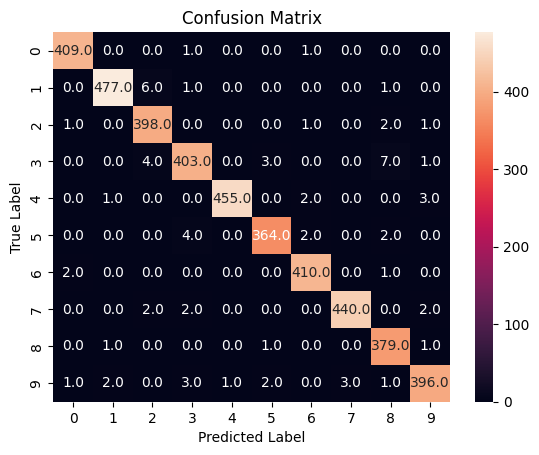

In [11]:
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

from sklearn.metrics import confusion_matrix
mtx = confusion_matrix(Y_true, Y_pred_classes)
sns.heatmap(mtx, annot=True, fmt='.1f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [12]:
test = test / 255.0
test = test.values.reshape(-1, 28, 28, 1)
results = model.predict(test)
results = np.argmax(results, axis=1)
submission = pd.DataFrame({'Label': results})
submission.to_csv('submission.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step


Saving Picture2.png to Picture2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


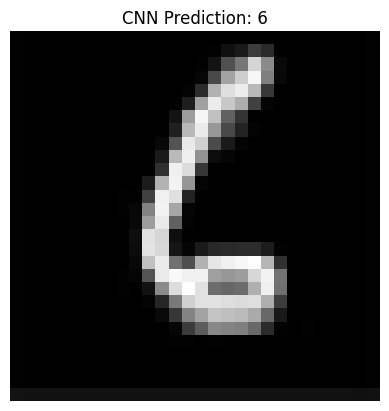

Predicted class: 6


In [13]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (28, 28))
img_resized = img_resized.astype('float32') / 255.0
img_reshaped = img_resized.reshape(1, 28, 28, 1)

# Apply data augmentation to the uploaded image
img_augmented = datagen.flow(img_reshaped, batch_size=1)[0]

pred_prob = model.predict(img_augmented)
pred_class = np.argmax(pred_prob, axis=1)[0]

plt.imshow(img_resized, cmap='gray')
plt.title(f'CNN Prediction: {pred_class}')
plt.axis('off')
plt.show()
print(f'Predicted class: {pred_class}')

Saving Picture3.png to Picture3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


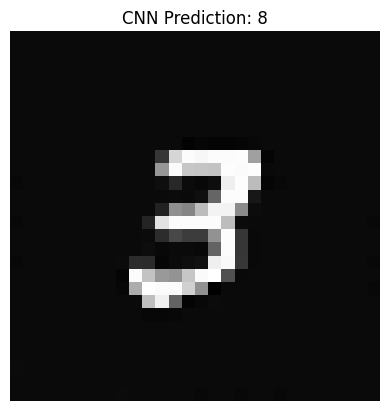

Predicted class: 8


In [14]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (28, 28))
img_resized = img_resized.astype('float32') / 255.0
img_reshaped = img_resized.reshape(1, 28, 28, 1)

# Apply data augmentation to the uploaded image
img_augmented = datagen.flow(img_reshaped, batch_size=1)[0]

pred_prob = model.predict(img_augmented)
pred_class = np.argmax(pred_prob, axis=1)[0]

plt.imshow(img_resized, cmap='gray')
plt.title(f'CNN Prediction: {pred_class}')
plt.axis('off')
plt.show()
print(f'Predicted class: {pred_class}')